# Data Analysis - Jumping Odometer & Engine Hour (JAN)

## Description
#### Odometer Jumps/Engine Hour Jumps
    Actual vehicle odometer and engine hour values are recorded by an ELD when power-up, power-down, login, logout, diagnostic or malfunction events are recorded.
    Accumulated vehicle odometer and engine hour values since the most recent power-up event are recorded by an ELD for all other events.
    Per Section 7.19 and 7.43 of the TS, the accumulated odometer value and engine hour value is always based upon the most recent power-on event. Accumulated miles/elapsed engine hours don’t get reset based on login/logout events. They are always based on the most recent power-up event, even if that event occurred several days prior to the recording of the accumulated miles/engine hours. Due to this requirement, there are instances when the ELD output file will not contain all events that pertain to an odometer or engine hour increase. 

#### Here are a couple of examples:

    • If a vehicle is not powered down between drivers and only one driver is logged into the device at a time, the ELD output file will not contain any intermediate driving events for any driver except the current driver being inspected/audited.

    Example: Driver A drives on day one, driver B drives on day two, then driver A drives on day three.
    While each driver logs in and out of the ELD, there are no vehicle shut-down or power-up events between drivers. There will be a gap in odometer/engine hour values in the RODS for driver A between day one and three. However, if driver A and driver B are co-drivers, both drivers must be logged into the ELD simultaneously and there would not be any odometer/engine hour gaps.

    • If an ELD output file does not contain a power-up event prior to duty status events, all duty status events would still have accumulated miles/engine hours. However, eRODS will not be able to compute the total odometer and engine hours by adding the expected actual values from power up and the accumulated values from duty status events. Login/logout events and diagnostic/malfunction events still display the actual odometer and engine hours readings from the ECM, which can be of aid to the safety official when reviewing a driver’s RODS.

### Assumption 1: 
Based on Rollingtrans' ELD users, what percentage of all heavy-duty trucks have the problem of mileage jumping?
Not Yet
### Assumption 2: 
What is the percentage of each brand of heavy-duty trucks with mileage jumping problems in the total mileage jumping problems?
Done
### Assumption 3: 
What is the percentage of heavy-duty trucks of each brand with mileage jumping problems in all heavy-duty trucks?
Not Yet
### Assumption 4: 
Based on the year division, what percentage of heavy trucks before and after 2016 have mileage jumps?
Yes
### According to the serial no. of the ELD, it can be divided into: 0, 3562-, 3562 ~ 4429, 4430 ~ 5330, 5331+. 
### Assumption 5: 
Of these numbers, what percentage of each had a mileage jump issue?
0.7% (4), 6.6% (37), 17.9% (103), 14.8% (85), 35.2% (201), 24.7% (141) 
### Assumption 6:
Once ELD has a problem of jumping mileage or hour, will it happen again?
Yes




In [395]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [396]:
ED = pd.read_excel('EDFiltered.xlsx')
ED

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
0,946,Bazik Trucking Inc,1122023,George Bazik,Mileage,Freightliner,2014,1FUGGLD57ELFK4085,0
1,1295,Bazik Trucking Inc,1162023,George Bazik,Mileage,Freightliner,2014,1FUGGLD57ELFK4085,0
2,1450,Bazik Trucking Inc,1182023,NaN,Mileage,Freightliner,2014,1FUGGLD57ELFK4085,0
3,27,E in April Trucking Inc.,1012023,Fujiang Li,Mileage,Freightliner,2016,1FUJGLBG1GLGY3570,0
4,257,Suhao Transport Inc.,1042023,Shuhao Zhang,Mileage,Freightliner,2016,1FUJGLBG1GLGY8249,0
...,...,...,...,...,...,...,...,...,...
2432,2251,TNS Express Inc.,1292023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604
2433,2321,TNS Express Inc.,1302023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604
2434,2377,TNS Express Inc.,1312023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604
2435,307,Sun Charter Inc,1052023,Gang Liu,Mileage/Hour,Prevost,2017,2PCH33491HC713515,211002771


In [397]:
ED.head()

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
0,946,Bazik Trucking Inc,1122023,George Bazik,Mileage,Freightliner,2014,1FUGGLD57ELFK4085,0
1,1295,Bazik Trucking Inc,1162023,George Bazik,Mileage,Freightliner,2014,1FUGGLD57ELFK4085,0
2,1450,Bazik Trucking Inc,1182023,NaN,Mileage,Freightliner,2014,1FUGGLD57ELFK4085,0
3,27,E in April Trucking Inc.,1012023,Fujiang Li,Mileage,Freightliner,2016,1FUJGLBG1GLGY3570,0
4,257,Suhao Transport Inc.,1042023,Shuhao Zhang,Mileage,Freightliner,2016,1FUJGLBG1GLGY8249,0


In [398]:
ED.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SequenceNo   2437 non-null   int64 
 1   OrgName      2437 non-null   object
 2   Date         2437 non-null   int64 
 3   DriverName   2427 non-null   object
 4   InvalidType  2437 non-null   object
 5   VehicleMake  2437 non-null   object
 6   VehicleYear  2437 non-null   int64 
 7   VIN          2437 non-null   object
 8   SerialNo     2437 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 171.5+ KB


In [399]:
EDNew = ED.drop_duplicates(subset=['VIN'])
EDNew

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
0,946,Bazik Trucking Inc,1122023,George Bazik,Mileage,Freightliner,2014,1FUGGLD57ELFK4085,0
3,27,E in April Trucking Inc.,1012023,Fujiang Li,Mileage,Freightliner,2016,1FUJGLBG1GLGY3570,0
4,257,Suhao Transport Inc.,1042023,Shuhao Zhang,Mileage,Freightliner,2016,1FUJGLBG1GLGY8249,0
13,823,Lydia Express Inc.,1112023,GUOBIN YANG,Mileage/Hour,Freightliner,2016,1FUJGLBG2GLHA0856,211005627
14,681,TM Transportation LLC,1092023,Luke May,Mileage,Freightliner,2011,1FUJGLBG6BSBA8097,0
...,...,...,...,...,...,...,...,...,...
2416,1441,Tailwind Express Inc,1182023,Zhongyi Wang,Mileage,Volvo,2019,4V4NC9TJ8KN217327,211004741
2417,247,SYH Trucking Company,1042023,Shao Yu,Mileage,Volvo,2013,4V4NC9TJ9DN131513,211003657
2418,117,TNS Express Inc.,1032023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604
2435,307,Sun Charter Inc,1052023,Gang Liu,Mileage/Hour,Prevost,2017,2PCH33491HC713515,211002771


# What's The Total Number of Heavy-Duty Trucks with The Issue of Jumping Mileage or Hour by Brands

### There are "Freightliner", "Volvo", "Kenworth", "Peterbilt", "Western Star", "International", "Ford", "Prevost" 

In [400]:
EDNew['VehicleMake'].value_counts()[:8]

Freightliner     421
Volvo             95
Kenworth          33
Peterbilt         17
International      5
Western Star       1
Prevost            1
Ford               1
Name: VehicleMake, dtype: int64

<AxesSubplot:title={'center':'Total amount happened jumping odometer defferenciate by truck brand'}, xlabel='The Total Issued Amount', ylabel="Trucks' Brands">

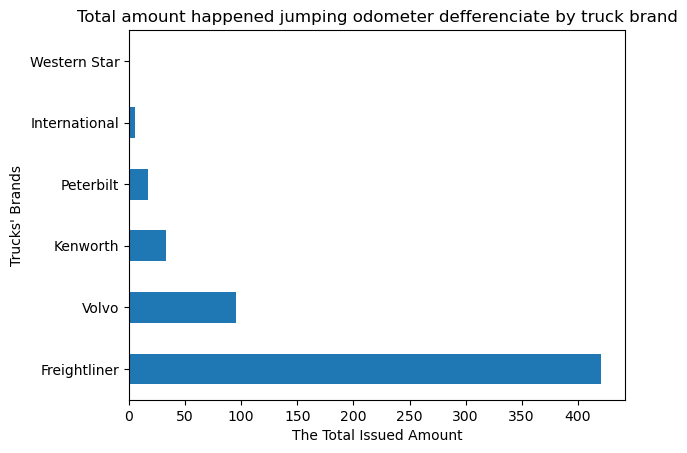

In [401]:
fig, ax = plt.subplots()
ax.set_title("Total amount happened jumping odometer defferenciate by truck brand")
ax.set_ylabel("Trucks' Brands")
ax.set_xlabel("The Total Issued Amount")
EDNew['VehicleMake'].value_counts()[:6].plot(kind='barh')

<AxesSubplot:xlabel="Heavy-Duty Trucks' Brands", ylabel='Percentage'>

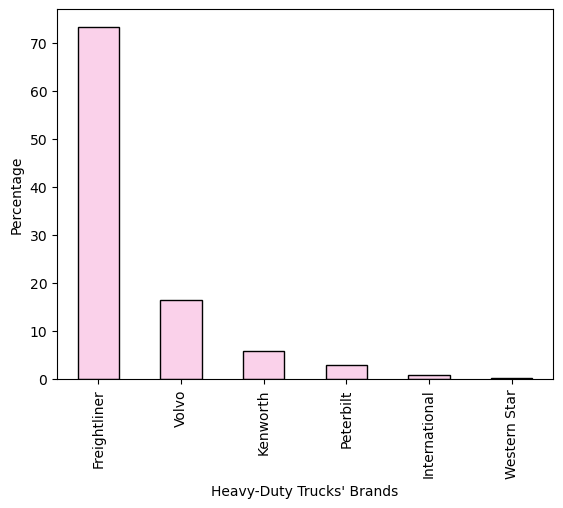

In [404]:
EDGraph = (EDNew['VehicleMake'].value_counts()[:6])/len(EDNew['VehicleMake'])*100
plt.xticks(rotation=-20, fontsize=10)
#plt.yticks(rotation=20, fontsize=10)
plt.xlabel("Heavy-Duty Trucks' Brands")
plt.ylabel('Percentage')
EDGraph.plot(kind='bar', color = (0.9, 0.1, 0.6, 0.2), edgecolor='black')


In [405]:
EDNew['InvalidType'].value_counts()[:3]

Mileage         362
Hour            124
Mileage/Hour     88
Name: InvalidType, dtype: int64

Text(0, 0.5, 'Jumping Issued')

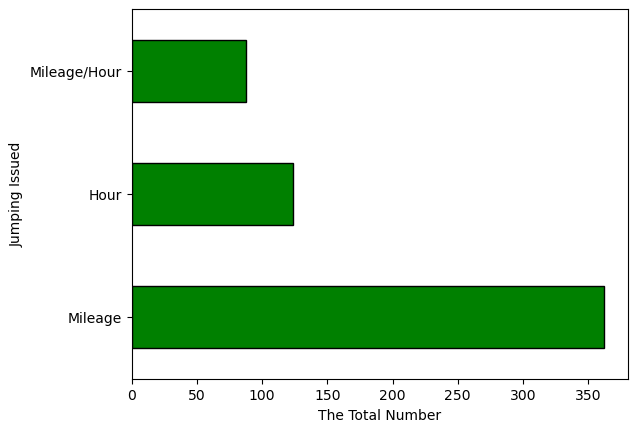

In [414]:
EDNew['InvalidType'].value_counts()[:3].plot(kind='barh', color="green", edgecolor='black')
plt.xlabel("The Total Number")
plt.ylabel('Jumping Issued')

In [415]:
EDM = EDNew.loc[EDNew['InvalidType'] == 'Mileage']
EDM

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
0,946,Bazik Trucking Inc,1122023,George Bazik,Mileage,Freightliner,2014,1FUGGLD57ELFK4085,0
3,27,E in April Trucking Inc.,1012023,Fujiang Li,Mileage,Freightliner,2016,1FUJGLBG1GLGY3570,0
4,257,Suhao Transport Inc.,1042023,Shuhao Zhang,Mileage,Freightliner,2016,1FUJGLBG1GLGY8249,0
14,681,TM Transportation LLC,1092023,Luke May,Mileage,Freightliner,2011,1FUJGLBG6BSBA8097,0
34,222,CJ Lee Inc.,1042023,Cyrus Lee,Mileage,Freightliner,2016,1FUJGLD50GLGU1774,0
...,...,...,...,...,...,...,...,...,...
2414,921,S R S Express Inc.,1122023,Sergey Gevorgyan,Mileage,Volvo,2014,4V4NC9TJ3EN176495,211002487
2416,1441,Tailwind Express Inc,1182023,Zhongyi Wang,Mileage,Volvo,2019,4V4NC9TJ8KN217327,211004741
2417,247,SYH Trucking Company,1042023,Shao Yu,Mileage,Volvo,2013,4V4NC9TJ9DN131513,211003657
2418,117,TNS Express Inc.,1032023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604


In [416]:
EDH = EDNew.loc[EDNew['InvalidType'] == 'Hour']
EDH

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
56,1929,Western Bucks Inc.,1252023,Furong Yang,Hour,Freightliner,2015,1FUJGLD52FLGS3534,211005240
62,751,W Safe Speed Inc,1102023,Jingjing Wu,Hour,Freightliner,2016,1FUJGLD54GLGZ8351,211004530
153,1922,JW USA LINK,1252023,Tian yuan Cai,Hour,Freightliner,2012,1FUJGLDR2CSBK1014,0
189,424,Youjen Express Inc,1062023,Congcong Li,Hour,Freightliner,2017,1FUJGLDR3HLHD2215,211005156
201,1999,Olivia Trucking Inc,1262023,Takwikanwe Katanga,Hour,Freightliner,2011,1FUJGLDR7BSAZ3693,0
...,...,...,...,...,...,...,...,...,...
2373,585,Hong Yun Trucking Inc.,1082023,Chonghua Yan,Hour,Volvo,2022,4V4NC9EJ5NN298546,211002777
2382,1828,Polar Trucking Inc,1232023,Hefei Shi,Hour,Freightliner,2023,4V4NC9EJ6PN611784,211005206
2383,1234,Devic Transportation,1152023,Cong Wang,Hour,Volvo,2019,4V4NC9EJ7KN201603,0
2400,1399,L N Z Trucking,1172023,tao wu,Hour,Volvo,2015,4V4NC9EJXFN908040,211004910


In [417]:
EDMH = EDNew.loc[EDNew['InvalidType'] == 'Mileage/Hour']
EDMH

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
13,823,Lydia Express Inc.,1112023,GUOBIN YANG,Mileage/Hour,Freightliner,2016,1FUJGLBG2GLHA0856,211005627
32,492,Lydia Express Inc.,1072023,Liang Cai,Mileage/Hour,Freightliner,2016,1FUJGLBG7GLGY8241,0
63,829,Rongyun Trucking Inc,1112023,Jian Li,Mileage/Hour,Freightliner,2016,1FUJGLD54GLGZ8365,0
160,2133,Taomore Supply Chain LTD,1272023,LIANG LI,Mileage/Hour,Freightliner,2016,1FUJGLDR2GLGW6971,211005002
194,842,Gao Shuai Trucking Inc,1112023,Jianwei Gao,Mileage/Hour,Freightliner,2018,1FUJGLDR4JLJF8128,211003305
...,...,...,...,...,...,...,...,...,...
2381,1693,SHJ Trucking Inc (DOT: 3197280),1212023,Yit Ning Ma,Mileage/Hour,Freightliner,2017,4V4NC9EJ6PN611736,211005135
2391,1468,ZCY Logistics,1182023,Chunyu Zhou,Mileage/Hour,Volvo,2019,4V4NC9EJ8KN898120,211004700
2392,609,Carrystar J Inc.,1082023,Jianwei Li,Mileage/Hour,Volvo,2023,4V4NC9EJ8PN611138,211004877
2402,260,FLSX Trucking Inc,1042023,Zhirong Liao,Mileage/Hour,Volvo,2016,4V4NC9EJXGN953089,211004803


In [418]:
import plotly.graph_objects as go
Vehiclemake = ["Freightliner", "Volvo", "Kenworth", "Peterbilt", "Western Star", "International"]

fig = go.Figure()
fig.add_trace(go.Bar(x=Vehiclemake, y=EDM['VehicleMake'].value_counts()[:6], name="Jumping Mileage", text=EDM['VehicleMake'].value_counts()[:6], textposition='outside'))
fig.add_trace(go.Bar(x=Vehiclemake, y=EDH['VehicleMake'].value_counts()[:6], name="Jumping Mileage", text=EDH['VehicleMake'].value_counts()[:6], textposition='outside'))
fig.add_trace(go.Bar(x=Vehiclemake, y=EDMH['VehicleMake'].value_counts()[:6], name="Jumping Mileage", text=EDMH['VehicleMake'].value_counts()[:6], textposition='outside'))


#fig = go.Figure(data=[
#    go.Bar(name='Jumping Mileage', x=Vehiclemake, y=EDM['VehicleMake'].value_counts()[:6]),
#    go.Bar(name='Jumping Hour', x=Vehiclemake, y=EDH['VehicleMake'].value_counts()[:6]),
#    go.Bar(name='Jumping Mileage/Hour', x=Vehiclemake, y=EDMH['VehicleMake'].value_counts()[:6]), 
#])
fig.update_layout(barmode='stack', title_text="The Total Number of Heavy-Duty Trucks with The Issue of Jumping Mileage or Hour by Brands", xaxis_title="Trucks' Brands", yaxis_title="Total Issued Amount")




#z = [EDM['VehicleMake'].value_counts()[:6], EDH['VehicleMake'].value_counts()[:6], EDMH['VehicleMake'].value_counts()[:6]]

#for i, g in enumerate(z):
#    go.text(i, g-8, g'{g}')

#fig.update_traces(text=z, textposition='outside')
#fig.update_traces(text=EDNew['InvalidType'].value_counts()[:3], textposition='outside')
#fig.update_traces(text=EDM['VehicleMake'].value_counts()[:6], textposition='outside')
#fig.update_traces(text=EDH['VehicleMake'].value_counts()[:6], textposition='outside')
#fig.update_traces(text=EDMH['VehicleMake'].value_counts()[:6], textposition='outside')
#fig.update_layout(uniformtext=dict(mode="hide", minsize=10))

#fig = go.bar(EDNew, x=VehicleMake, )
fig.show()

In [158]:
#import plotly.graph_objects as go
#Vehiclemake = ["Freightliner", "Volvo", "Kenworth", "Peterbilt", "Western Star", "International"]
#fig = go.Figure(data=[
#    go.Bar(name='Jumping Mileage', x=Vehiclemake, y=EDM['VehicleMake'].value_counts()[:6]),
#    go.Bar(name='Jumping Hour', x=Vehiclemake, y=EDH['VehicleMake'].value_counts()[:6]),
#    go.Bar(name='Jumping Mileage/Hour', x=Vehiclemake, y=EDMH['VehicleMake'].value_counts()[:6]), 
#])
#fig.update_layout(barmode='stack', title_text="The Total Number of Heavy-Duty Trucks with The Issue of Jumping Mileage or Hour by Brands")




#z = [EDM['VehicleMake'].value_counts()[:6], EDH['VehicleMake'].value_counts()[:6], EDMH['VehicleMake'].value_counts()[:6]]

#for i, g in enumerate(z):
#    go.text(i, g-8, g'{g}')

#fig.update_traces(text=z, textposition='outside')
#fig.update_traces(text=EDNew['InvalidType'].value_counts()[:3], textposition='outside')
#fig.update_traces(text=EDM['VehicleMake'].value_counts()[:6], textposition='outside')
#fig.update_traces(text=EDH['VehicleMake'].value_counts()[:6], textposition='outside')
#fig.update_traces(text=EDMH['VehicleMake'].value_counts()[:6], textposition='outside')
#fig.update_layout(uniformtext=dict(mode="hide", minsize=10))

#fig = go.bar(EDNew, x=VehicleMake, )
#fig.show()

In [419]:
# plot grouped bar chart
fig = go.Figure()
fig.add_trace(go.Bar(x=Vehiclemake, y=EDM['VehicleMake'].value_counts()[:6], name="Jumping Mileage", text=EDM['VehicleMake'].value_counts()[:6], textposition='outside'))
fig.add_trace(go.Bar(x=Vehiclemake, y=EDH['VehicleMake'].value_counts()[:6], name="Jumping Hour", text=EDH['VehicleMake'].value_counts()[:6], textposition='outside'))
fig.add_trace(go.Bar(x=Vehiclemake, y=EDMH['VehicleMake'].value_counts()[:6], name="Jumping Mileage/Hour", text=EDMH['VehicleMake'].value_counts()[:6], textposition='outside'))
#fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
#                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(barmode="group", title_text="The Total Number of Heavy-Duty Trucks with The Issue of Jumping Mileage or Hour by Brands", xaxis_title="Trucks' Brands", yaxis_title="Total Issued Amount")
fig.show()

In [420]:
EDM2017 = EDM.loc[EDM["VehicleYear"]>=2017]
EDM2017

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
149,25,ZFX Transportation Inc.,1012023,Wei Liu,Mileage,Freightliner,2017,1FUJGLDR0HLHM7582,0
161,140,AT Trucking Inc.,1032023,Jun Yuan,Mileage,Freightliner,2017,1FUJGLDR2HLHF1869,211003045
190,1270,RXY Trucking Inc,1152023,mingchun chao,Mileage,Freightliner,2017,1FUJGLDR4HLHF2408,211003086
191,499,X-ang Inc,1072023,Haihua Wang,Mileage,Freightliner,2017,1FUJGLDR4HLHM7701,211003465
192,591,Magic Board Logistic Inc,1082023,NaN,Mileage,Freightliner,2018,1FUJGLDR4JLHX2667,0
...,...,...,...,...,...,...,...,...,...
2393,975,I&R Logistics Inc,1122023,Chris Sun,Mileage,Volvo,2023,4V4NC9EJ8PN611768,211005170
2397,952,J & Y Express Inc.,1122023,Mike Jin,Mileage,Volvo,2023,4V4NC9EJ8PN612094,211001935
2398,753,Link Logistics Inc.,1102023,Jianquan Yuan,Mileage,Volvo,2023,4V4NC9EJ9PN611794,211004939
2416,1441,Tailwind Express Inc,1182023,Zhongyi Wang,Mileage,Volvo,2019,4V4NC9TJ8KN217327,211004741


In [421]:
EDM2016 = EDM.loc[EDM["VehicleYear"]<2017]
EDM2016

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
0,946,Bazik Trucking Inc,1122023,George Bazik,Mileage,Freightliner,2014,1FUGGLD57ELFK4085,0
3,27,E in April Trucking Inc.,1012023,Fujiang Li,Mileage,Freightliner,2016,1FUJGLBG1GLGY3570,0
4,257,Suhao Transport Inc.,1042023,Shuhao Zhang,Mileage,Freightliner,2016,1FUJGLBG1GLGY8249,0
14,681,TM Transportation LLC,1092023,Luke May,Mileage,Freightliner,2011,1FUJGLBG6BSBA8097,0
34,222,CJ Lee Inc.,1042023,Cyrus Lee,Mileage,Freightliner,2016,1FUJGLD50GLGU1774,0
...,...,...,...,...,...,...,...,...,...
2310,1936,FEIDA Express Inc,1252023,ZESHI LI,Mileage,Volvo,2016,4V4NC9EHXGN945524,211001711
2407,61,Fortune Star Inc,1012023,Yan Quan,Mileage,Volvo,2015,4V4NC9TH9FN908336,0
2414,921,S R S Express Inc.,1122023,Sergey Gevorgyan,Mileage,Volvo,2014,4V4NC9TJ3EN176495,211002487
2417,247,SYH Trucking Company,1042023,Shao Yu,Mileage,Volvo,2013,4V4NC9TJ9DN131513,211003657


In [422]:
EDH2017 = EDH.loc[EDH["VehicleYear"]>=2017]
EDH2017

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
189,424,Youjen Express Inc,1062023,Congcong Li,Hour,Freightliner,2017,1FUJGLDR3HLHD2215,211005156
217,24,Pickup USA,1012023,Junye Hu,Hour,Freightliner,2018,1FUJGLDR7JLJH7949,211003923
228,285,Nine Dragon Transportation Inc,1052023,SUN KANG,Hour,Freightliner,2018,1FUJGLDR8JLJJ7313,211000994
229,449,Eight Banners Trucking Inc.,1072023,Kai Yang,Hour,Freightliner,2017,1FUJGLDR9HLHD2929,0
231,882,Fande Group Inc.,1112023,Fande Kong,Hour,Freightliner,2017,1FUJGLDR9HLHW0511,0
...,...,...,...,...,...,...,...,...,...
2348,421,Brilliant International LLC,1062023,Jiayi Li,Hour,Volvo,2020,4V4NC9EJ3LN200644,0
2373,585,Hong Yun Trucking Inc.,1082023,Chonghua Yan,Hour,Volvo,2022,4V4NC9EJ5NN298546,211002777
2382,1828,Polar Trucking Inc,1232023,Hefei Shi,Hour,Freightliner,2023,4V4NC9EJ6PN611784,211005206
2383,1234,Devic Transportation,1152023,Cong Wang,Hour,Volvo,2019,4V4NC9EJ7KN201603,0


In [423]:
EDH2016 = EDH.loc[EDH["VehicleYear"]<2017]
EDH2016

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
56,1929,Western Bucks Inc.,1252023,Furong Yang,Hour,Freightliner,2015,1FUJGLD52FLGS3534,211005240
62,751,W Safe Speed Inc,1102023,Jingjing Wu,Hour,Freightliner,2016,1FUJGLD54GLGZ8351,211004530
153,1922,JW USA LINK,1252023,Tian yuan Cai,Hour,Freightliner,2012,1FUJGLDR2CSBK1014,0
201,1999,Olivia Trucking Inc,1262023,Takwikanwe Katanga,Hour,Freightliner,2011,1FUJGLDR7BSAZ3693,0
564,861,4 Season Express Inc,1112023,Kil H Lee,Hour,Freightliner,2016,3AKGGLD53GSGC5434,211005516
880,961,Bright East Star LLC,1122023,Runfang Song,Hour,Freightliner,2016,3AKJGLD56GSGU0679,211003977
882,2333,QL Trucking Inc,1302023,Qinglong Li,Hour,Freightliner,2016,3AKJGLD56GSGU1105,211004210
996,145,Garoon Express,1032023,Arian Marous,Hour,Freightliner,2014,3AKJGLD61ESFM3170,0
1011,1906,GL Coast Express,1242023,Fenghe Liu,Hour,Freightliner,2016,3AKJGLDR0GSGW8335,211003201
1266,1934,Gold Apple Trucking Inc,1252023,BENNIE WHITE,Hour,Freightliner,2016,3AKJGLDR4GSGW7284,211005482


In [424]:
EDMH2017 = EDMH.loc[EDMH["VehicleYear"]>=2017]
EDMH2017

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
194,842,Gao Shuai Trucking Inc,1112023,Jianwei Gao,Mileage/Hour,Freightliner,2018,1FUJGLDR4JLJF8128,211003305
274,2412,PENGFEI EXPRESS INC,1312023,ke liu,Mileage/Hour,Freightliner,2020,1FUJHHDR4LLLU8559,211004139
279,1490,TTL Transport Inc,1182023,Guoliang Wang,Mileage/Hour,Freightliner,2019,1FUJHHDR8KLKL6801,211005000
322,2215,Fast Arrival Transportation LLC,1282023,Haohao Zhang,Mileage/Hour,Kenworth,2019,1XKYD49X1KJ367666,211005244
466,137,"LuLu 88 Trucking, Inc.",1032023,Yongchun Bai,Mileage/Hour,Kenworth,2022,1XKYD49X9NJ494492,0
...,...,...,...,...,...,...,...,...,...
2342,2436,Top Priority Transporation Inc.,1312023,Dongqun Liu,Mileage/Hour,Volvo,2021,4V4NC9EJ2MN272226,211000548
2381,1693,SHJ Trucking Inc (DOT: 3197280),1212023,Yit Ning Ma,Mileage/Hour,Freightliner,2017,4V4NC9EJ6PN611736,211005135
2391,1468,ZCY Logistics,1182023,Chunyu Zhou,Mileage/Hour,Volvo,2019,4V4NC9EJ8KN898120,211004700
2392,609,Carrystar J Inc.,1082023,Jianwei Li,Mileage/Hour,Volvo,2023,4V4NC9EJ8PN611138,211004877


In [425]:
EDMH2016 = EDMH.loc[EDMH["VehicleYear"]<2017]
EDMH2016

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
13,823,Lydia Express Inc.,1112023,GUOBIN YANG,Mileage/Hour,Freightliner,2016,1FUJGLBG2GLHA0856,211005627
32,492,Lydia Express Inc.,1072023,Liang Cai,Mileage/Hour,Freightliner,2016,1FUJGLBG7GLGY8241,0
63,829,Rongyun Trucking Inc,1112023,Jian Li,Mileage/Hour,Freightliner,2016,1FUJGLD54GLGZ8365,0
160,2133,Taomore Supply Chain LTD,1272023,LIANG LI,Mileage/Hour,Freightliner,2016,1FUJGLDR2GLGW6971,211005002
195,180,Kasomo LLC,1042023,Amuri Kasomo,Mileage/Hour,Freightliner,2010,1FUJGLDR5ASAR8731,0
607,1129,Flying Trucking NW LLC,1142023,Ming Lu,Mileage/Hour,Freightliner,2014,3AKJGLBG2ESFJ1226,211003438
686,1544,PSPW Trucking Inc,1192023,Wen li Xia,Mileage/Hour,Freightliner,2016,3AKJGLD50GSGV2312,0
817,1759,Golden Drum LLC,1222023,Eh Dee Moo,Mileage/Hour,Freightliner,2016,3AKJGLD52GSGU6575,0
836,432,Brother H K Trucking Inc.,1062023,LIMIN DONG,Mileage/Hour,Freightliner,2016,3AKJGLD55GSGU1192,0
912,200,Barrera & Son Trucking,1042023,Saul Barrera,Mileage/Hour,Freightliner,2016,3AKJGLD57GSGW2612,0


In [426]:
# plot grouped bar chart
fig = go.Figure()
#fig.add_trace(go.Bar(x=Vehiclemake, y=EDM['VehicleMake'].value_counts()[:6], name="Jumping Mileage", text=EDM['VehicleMake'].value_counts()[:6], textposition='outside', offsetgroup=0,))
#fig.add_trace(go.Bar(x=Vehiclemake, y=EDH['VehicleMake'].value_counts()[:6], name="Jumping Mileage", text=EDH['VehicleMake'].value_counts()[:6], textposition='outside', offsetgroup=1,))
#fig.add_trace(go.Bar(x=Vehiclemake, y=EDMH['VehicleMake'].value_counts()[:6], name="Jumping Mileage", text=EDMH['VehicleMake'].value_counts()[:6], textposition='outside', offsetgroup=2,))
fig.add_trace(go.Bar(x=Vehiclemake, y=EDM2017['VehicleMake'].value_counts()[:6], name=">= 2017 year Jumping Mileage", text=EDM2017['VehicleMake'].value_counts()[:6], textposition='outside', offsetgroup=0,))
fig.add_trace(go.Bar(x=Vehiclemake, y=EDM2016['VehicleMake'].value_counts()[:6], name="< 2017 year Jumping Mileage", text=EDM2016['VehicleMake'].value_counts()[:6], textposition='inside', offsetgroup=0,))
fig.add_trace(go.Bar(x=Vehiclemake, y=EDH2017['VehicleMake'].value_counts()[:6], name=">= 2017 year Jumping Hour", text=EDH2017['VehicleMake'].value_counts()[:6], textposition='outside', offsetgroup=1,))
fig.add_trace(go.Bar(x=Vehiclemake, y=EDH2016['VehicleMake'].value_counts()[:6], name="< 2017 year Jumping Hour", text=EDH2016['VehicleMake'].value_counts()[:6], textposition='outside', offsetgroup=1,))
fig.add_trace(go.Bar(x=Vehiclemake, y=EDMH2017['VehicleMake'].value_counts()[:6], name=">= 2017 year Jumping Mileage/Hour", text=EDMH2017['VehicleMake'].value_counts()[:6], textposition='outside', offsetgroup=2,))
fig.add_trace(go.Bar(x=Vehiclemake, y=EDMH2016['VehicleMake'].value_counts()[:6], name="< 2017 year Jumping Mileage/Hour", text=EDMH2016['VehicleMake'].value_counts()[:6], textposition='auto', offsetgroup=2,))

fig.add_annotation(x=Vehiclemake, y=EDM2017['VehicleMake'].value_counts()[:6],
            text="Text annotation with arrow",
            showarrow=True,
            arrowhead=1)

fig.update_layout(barmode="group", title_text="The Total Number of Heavy-Duty Trucks with The Issue of Jumping Mileage or Hour by Brands", xaxis_title="Trucks' Brands", yaxis_title="Total Issued Amount")
fig.show()

In [427]:
EDNew5331 = EDNew.loc[EDNew["SerialNo"]>211005331]
EDNew5331

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
13,823,Lydia Express Inc.,1112023,GUOBIN YANG,Mileage/Hour,Freightliner,2016,1FUJGLBG2GLHA0856,211005627
96,1261,TS Transportation Inc.,1152023,Xuechen He,Mileage,Freightliner,2016,1FUJGLD58GLGV6569,211005491
197,1155,Ryno Express Corp,1142023,Ryan Kaday Thrua,Mileage,Freightliner,2013,1FUJGLDR6DSBV4938,211005379
225,629,"GS Flash Logistics, Inc.",1092023,meng zhang,Mileage,Freightliner,2018,1FUJGLDR8JLHG8097,211005350
465,1010,T & L Carriers Inc.,1122023,Changlong Li,Mileage,Kenworth,2019,1XKYD49X9KJ221242,211005500
533,227,Rongyun Trucking Inc,1042023,Wan Yu,Mileage/Hour,Peterbilt,2023,1XPBD49X9PD880332,211005411
564,861,4 Season Express Inc,1112023,Kil H Lee,Hour,Freightliner,2016,3AKGGLD53GSGC5434,211005516
1036,139,ZQY Logistics Inc,1032023,Zhongqing Yang,Mileage/Hour,Freightliner,2017,3AKJGLDR0HSHZ6706,211005583
1066,389,L&C Speed Inc,1062023,waichung tam,Hour,Freightliner,2017,3AKJGLDR1HSJA5093,211005418
1266,1934,Gold Apple Trucking Inc,1252023,BENNIE WHITE,Hour,Freightliner,2016,3AKJGLDR4GSGW7284,211005482


In [428]:
EDNew4430 = EDNew[(EDNew["SerialNo"]>211004429) & (EDNew["SerialNo"]<211005331)]
EDNew4430

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
56,1929,Western Bucks Inc.,1252023,Furong Yang,Hour,Freightliner,2015,1FUJGLD52FLGS3534,211005240
59,54,Golden Shore Trucking Corp,1012023,Li Liu,Mileage,Freightliner,2015,1FUJGLD53FLGF4013,211005133
60,519,XYZ Logistics Inc,1072023,weikeng li,Mileage,Freightliner,2016,1FUJGLD54GLGV0378,211004864
62,751,W Safe Speed Inc,1102023,Jingjing Wu,Hour,Freightliner,2016,1FUJGLD54GLGZ8351,211004530
88,1376,Gabriel Logistics Inc.,1172023,Guowei Zhong,Mileage,Freightliner,2015,1FUJGLD55FLGL7086,211004740
...,...,...,...,...,...,...,...,...,...
2393,975,I&R Logistics Inc,1122023,Chris Sun,Mileage,Volvo,2023,4V4NC9EJ8PN611768,211005170
2398,753,Link Logistics Inc.,1102023,Jianquan Yuan,Mileage,Volvo,2023,4V4NC9EJ9PN611794,211004939
2400,1399,L N Z Trucking,1172023,tao wu,Hour,Volvo,2015,4V4NC9EJXFN908040,211004910
2402,260,FLSX Trucking Inc,1042023,Zhirong Liao,Mileage/Hour,Volvo,2016,4V4NC9EJXGN953089,211004803


In [429]:
EDNew3562 = EDNew[(EDNew["SerialNo"]>211003561) & (EDNew["SerialNo"]<211004430)]
EDNew3562

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
58,1634,Z8W Trucking LLC,1202023,Zhijun Wang,Mileage,Freightliner,2016,1FUJGLD52GLGU2750,211003611
86,624,Trigo Truckin LLC,1092023,Tan Tran,Mileage,Freightliner,2015,1FUJGLD55FLGE7497,211003752
217,24,Pickup USA,1012023,Junye Hu,Hour,Freightliner,2018,1FUJGLDR7JLJH7949,211003923
230,269,WLH Logistics LLC,1052023,Wenlong Sun,Mileage,Freightliner,2017,1FUJGLDR9HLHP0469,211004054
235,212,O&C Bros Transportation Inc,1042023,xueyou chen,Hour,Freightliner,2018,1FUJGLDRXJLHX2687,211003593
...,...,...,...,...,...,...,...,...,...
2372,280,Triple Gold Trucking LLC,1052023,Anyong Ming,Mileage,Volvo,2022,4V4NC9EJ5NN298532,211004041
2379,1924,CH Transportation Inc,1252023,Xiaojun Yang,Mileage,Volvo,2020,4V4NC9EJ6LN198663,211004016
2380,430,Happy Group Inc,1062023,Xiaoliang Kong,Mileage,Volvo,2022,4V4NC9EJ6NN298507,211003999
2385,443,J R J Transgroup LLC,1072023,jiangbao cui,Mileage,Volvo,2022,4V4NC9EJ7NN298564,211003724


In [430]:
EDNew3561 = EDNew.loc[(EDNew["SerialNo"]<211003562) & (EDNew["SerialNo"]>171110000)]
EDNew3561

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
46,1049,GLL Trucking Inc,1132023,Yunxiao Li,Mileage,Freightliner,2015,1FUJGLD52FLFU8737,211003494
57,899,GLL Trucking Inc,1112023,Yunxiao Li,Mileage,Freightliner,2016,1FUJGLD52GLGR8784,211003528
64,221,KAL Cargo Inc,1042023,Gurwinder Singh,Mileage,Freightliner,2016,1FUJGLD54GLHF6650,211000816
103,59,Super Trucking Inc (DOT: 2801642),1012023,fengzhong zhao,Mileage,Freightliner,2016,1FUJGLD5XGLGV0451,211002382
119,463,Forest Ocean Trucking Inc,1072023,Junjiang Yu,Mileage,Freightliner,2016,1FUJGLD5XGLGV7349,211000913
...,...,...,...,...,...,...,...,...,...
2373,585,Hong Yun Trucking Inc.,1082023,Chonghua Yan,Hour,Volvo,2022,4V4NC9EJ5NN298546,211002777
2397,952,J & Y Express Inc.,1122023,Mike Jin,Mileage,Volvo,2023,4V4NC9EJ8PN612094,211001935
2414,921,S R S Express Inc.,1122023,Sergey Gevorgyan,Mileage,Volvo,2014,4V4NC9TJ3EN176495,211002487
2418,117,TNS Express Inc.,1032023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604


In [431]:
EDNew0 = EDNew.loc[(EDNew["SerialNo"]==0)]
EDNew0

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
0,946,Bazik Trucking Inc,1122023,George Bazik,Mileage,Freightliner,2014,1FUGGLD57ELFK4085,0
3,27,E in April Trucking Inc.,1012023,Fujiang Li,Mileage,Freightliner,2016,1FUJGLBG1GLGY3570,0
4,257,Suhao Transport Inc.,1042023,Shuhao Zhang,Mileage,Freightliner,2016,1FUJGLBG1GLGY8249,0
14,681,TM Transportation LLC,1092023,Luke May,Mileage,Freightliner,2011,1FUJGLBG6BSBA8097,0
32,492,Lydia Express Inc.,1072023,Liang Cai,Mileage/Hour,Freightliner,2016,1FUJGLBG7GLGY8241,0
...,...,...,...,...,...,...,...,...,...
2348,421,Brilliant International LLC,1062023,Jiayi Li,Hour,Volvo,2020,4V4NC9EJ3LN200644,0
2351,578,TM Stefan,1082023,Jiaxu Zhou,Mileage,Volvo,2022,4V4NC9EJ3NN295175,0
2383,1234,Devic Transportation,1152023,Cong Wang,Hour,Volvo,2019,4V4NC9EJ7KN201603,0
2405,986,M&K National Inc,1122023,Richard Arjani,Hour,Volvo,2022,4V4NC9EJXNN295190,0


In [432]:
EDNew171 = EDNew.loc[(EDNew["SerialNo"]<211000000) & (EDNew["SerialNo"]>0)] 
EDNew171

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
366,171,Westside Connection Corp,1032023,Carlos Cameros,Mileage,Kenworth,2014,1XKYD49X4EJ389360,171002405
385,1932,M H Trucking Express Inc.,1252023,Lichen Deng,Mileage,Kenworth,2022,1XKYD49X4NJ133753,171001941
473,1196,Barrack LLC.,1152023,Byiringiro Tumaini,Hour,Kenworth,2018,1XKYDP9X6JJ207105,171001799
2436,1035,Z Tour LLC,1132023,Mingrui Liu,Mileage,Ford,2017,1FBAX2CM7HKA67208,171100134


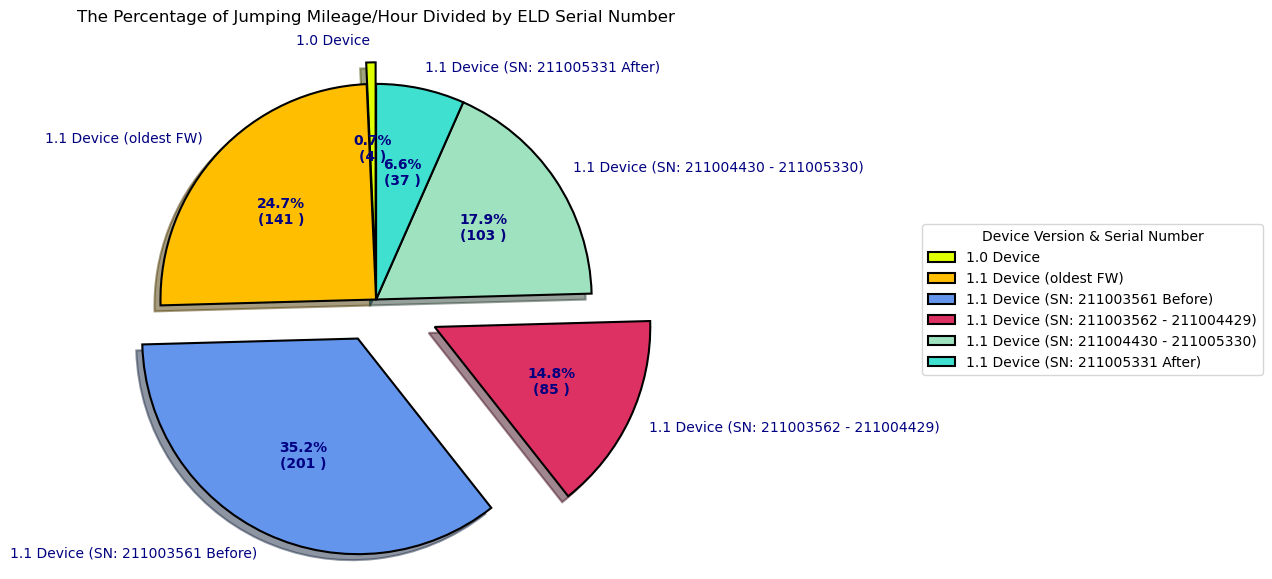

In [433]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset
Serialno = ['1.0 Device', '1.1 Device (oldest FW)', '1.1 Device (SN: 211003561 Before)',
		'1.1 Device (SN: 211003562 - 211004429)', '1.1 Device (SN: 211004430 - 211005330)', '1.1 Device (SN: 211005331 After)']

data = [4, 142, 202, 85, 103, 38]


# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)

# Creating color parameters
colors = ( "#DFFF00", "#FFBF00", "#6495ED",
		"#DE3163", "#9FE2BF", "#40E0D0")

# Wedge properties
wp = { 'linewidth' : 1.5, 'edgecolor' : "black" }

# Creating autocpt arguments
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n({:d} )".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
								autopct = lambda pct: func(pct, data),
								explode = explode,
								labels = Serialno,
								shadow = True,
								colors = colors,
								startangle = 90,
								wedgeprops = wp,
								textprops = dict(color ="#000080"))

# Adding legend
ax.legend(wedges, Serialno,
		title ="Device Version & Serial Number",
		loc ="center left",
		bbox_to_anchor =(1.5, 0, 0.5, 1))

plt.setp(autotexts, size = 10, weight ="bold")
ax.set_title("The Percentage of Jumping Mileage/Hour Divided by ELD Serial Number")

# show plot
plt.show()


In [434]:
EDDuplicate = ED["VIN"].duplicated()
EDDuplicate

0       False
1        True
2        True
3       False
4       False
        ...  
2432     True
2433     True
2434     True
2435    False
2436    False
Name: VIN, Length: 2437, dtype: bool

In [435]:
EDKD = ED["VIN"].duplicated(keep = False)
EDKD

0        True
1        True
2        True
3       False
4        True
        ...  
2432     True
2433     True
2434     True
2435    False
2436    False
Name: VIN, Length: 2437, dtype: bool

In [436]:
#ED2 = ED.assign(IsDuplicated=EDKD)
#ED.loc[:, "IsDuplicated"] = list(EDKD)
ED3 = ED.assign(IsDuplicated = ED["VIN"].duplicated(keep = False))
ED3

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo,IsDuplicated
0,946,Bazik Trucking Inc,1122023,George Bazik,Mileage,Freightliner,2014,1FUGGLD57ELFK4085,0,True
1,1295,Bazik Trucking Inc,1162023,George Bazik,Mileage,Freightliner,2014,1FUGGLD57ELFK4085,0,True
2,1450,Bazik Trucking Inc,1182023,NaN,Mileage,Freightliner,2014,1FUGGLD57ELFK4085,0,True
3,27,E in April Trucking Inc.,1012023,Fujiang Li,Mileage,Freightliner,2016,1FUJGLBG1GLGY3570,0,False
4,257,Suhao Transport Inc.,1042023,Shuhao Zhang,Mileage,Freightliner,2016,1FUJGLBG1GLGY8249,0,True
...,...,...,...,...,...,...,...,...,...,...
2432,2251,TNS Express Inc.,1292023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604,True
2433,2321,TNS Express Inc.,1302023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604,True
2434,2377,TNS Express Inc.,1312023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604,True
2435,307,Sun Charter Inc,1052023,Gang Liu,Mileage/Hour,Prevost,2017,2PCH33491HC713515,211002771,False


In [437]:
#ED3.loc(ED3["IsDuplicated"]=="True")
EDD = ED3.loc[(ED3["IsDuplicated"]==True)]
EDD

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo,IsDuplicated
0,946,Bazik Trucking Inc,1122023,George Bazik,Mileage,Freightliner,2014,1FUGGLD57ELFK4085,0,True
1,1295,Bazik Trucking Inc,1162023,George Bazik,Mileage,Freightliner,2014,1FUGGLD57ELFK4085,0,True
2,1450,Bazik Trucking Inc,1182023,NaN,Mileage,Freightliner,2014,1FUGGLD57ELFK4085,0,True
4,257,Suhao Transport Inc.,1042023,Shuhao Zhang,Mileage,Freightliner,2016,1FUJGLBG1GLGY8249,0,True
5,294,Suhao Transport Inc.,1052023,Shuhao Zhang,Mileage,Freightliner,2016,1FUJGLBG1GLGY8249,0,True
...,...,...,...,...,...,...,...,...,...,...
2430,1915,TNS Express Inc.,1252023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604,True
2431,2167,TNS Express Inc.,1282023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604,True
2432,2251,TNS Express Inc.,1292023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604,True
2433,2321,TNS Express Inc.,1302023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604,True


In [438]:
EDKD = ED.set_index("VIN")
EDKD

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,SerialNo
VIN,,,,,,,,
1FUGGLD57ELFK4085,946,Bazik Trucking Inc,1122023,George Bazik,Mileage,Freightliner,2014,0
1FUGGLD57ELFK4085,1295,Bazik Trucking Inc,1162023,George Bazik,Mileage,Freightliner,2014,0
1FUGGLD57ELFK4085,1450,Bazik Trucking Inc,1182023,NaN,Mileage,Freightliner,2014,0
1FUJGLBG1GLGY3570,27,E in April Trucking Inc.,1012023,Fujiang Li,Mileage,Freightliner,2016,0
1FUJGLBG1GLGY8249,257,Suhao Transport Inc.,1042023,Shuhao Zhang,Mileage,Freightliner,2016,0
...,...,...,...,...,...,...,...,...
5KJJBHDR6GLHA8737,2251,TNS Express Inc.,1292023,Yan Wu,Mileage,Western Star,2016,211002604
5KJJBHDR6GLHA8737,2321,TNS Express Inc.,1302023,Yan Wu,Mileage,Western Star,2016,211002604
5KJJBHDR6GLHA8737,2377,TNS Express Inc.,1312023,Yan Wu,Mileage,Western Star,2016,211002604


In [439]:
ED.index.duplicated()

array([False, False, False, ..., False, False, False])

In [440]:
ED.loc[ED['VIN'] == "5KJJBHDR6GLHA8737"]

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
2418,117,TNS Express Inc.,1032023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604
2419,177,TNS Express Inc.,1042023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604
2420,359,TNS Express Inc.,1062023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604
2421,437,TNS Express Inc.,1072023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604
2422,532,TNS Express Inc.,1082023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604
2423,800,TNS Express Inc.,1112023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604
2424,912,TNS Express Inc.,1122023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604
2425,1012,TNS Express Inc.,1132023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604
2426,1347,TNS Express Inc.,1172023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604
2427,1440,TNS Express Inc.,1182023,Yan Wu,Mileage,Western Star,2016,5KJJBHDR6GLHA8737,211002604


In [441]:
ED.loc[ED['VIN'] == "4V4NC9EJ0PN611764"]

,SequenceNo,OrgName,Date,DriverName,InvalidType,VehicleMake,VehicleYear,VIN,SerialNo
2330,96,J & L Flourish Express Inc.,1022023,Tiefei Song,Mileage,Volvo,2023,4V4NC9EJ0PN611764,0
2331,541,J & L Flourish Express Inc.,1082023,Tiefei Song,Mileage,Volvo,2023,4V4NC9EJ0PN611764,0
2332,713,J & L Flourish Express Inc.,1102023,Tiefei Song,Mileage,Volvo,2023,4V4NC9EJ0PN611764,0
2333,969,J & L Flourish Express Inc.,1122023,Tiefei Song,Mileage,Volvo,2023,4V4NC9EJ0PN611764,0
2334,1509,J & L Flourish Express Inc.,1182023,Tiefei Song,Mileage,Volvo,2023,4V4NC9EJ0PN611764,0
2335,1768,J & L Flourish Express Inc.,1222023,Tiefei Song,Mileage/Hour,Volvo,2023,4V4NC9EJ0PN611764,0
2336,1815,J & L Flourish Express Inc.,1232023,Tiefei Song,Mileage,Volvo,2023,4V4NC9EJ0PN611764,0
